In [1]:
import pandas as pd
import numpy as np


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
df = pd.read_csv("/content/drive/MyDrive/dc dataset final.csv")
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxommobil stock,Price S&P Oil,Price treasury,Price WTI crude oil,Unnamed: 6,Unnamed: 7
0,26-03-2014,78.867645,62.598408,"10,876.50",2.694,100.23,NaN,NaN
1,27-03-2014,78.840851,63.616409,"10,896.20",2.683,101.28,NaN,NaN
2,28-03-2014,79.396973,64.581490,"10,959.70",2.723,101.60,NaN,NaN
3,31-03-2014,79.671669,64.568283,"11,103.20",2.719,101.57,NaN,NaN
4,01-04-2014,79.731964,64.601311,"11,153.90",2.755,99.69,NaN,NaN


In [4]:
df = df.drop("Unnamed: 7",axis=1)
df = df.drop("Unnamed: 6",axis=1)
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxommobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
0,26-03-2014,78.867645,62.598408,"10,876.50",2.694,100.23
1,27-03-2014,78.840851,63.616409,"10,896.20",2.683,101.28
2,28-03-2014,79.396973,64.581490,"10,959.70",2.723,101.60
3,31-03-2014,79.671669,64.568283,"11,103.20",2.719,101.57
4,01-04-2014,79.731964,64.601311,"11,153.90",2.755,99.69


In [5]:
df["Date"] = pd.to_datetime(df["Date"], format='%d-%m-%Y', errors='coerce')
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxommobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
0,2014-03-26,78.867645,62.598408,"10,876.50",2.694,100.23
1,2014-03-27,78.840851,63.616409,"10,896.20",2.683,101.28
2,2014-03-28,79.396973,64.581490,"10,959.70",2.723,101.60
3,2014-03-31,79.671669,64.568283,"11,103.20",2.719,101.57
4,2014-04-01,79.731964,64.601311,"11,153.90",2.755,99.69


In [6]:
df["Date"].dtype

dtype('<M8[ns]')

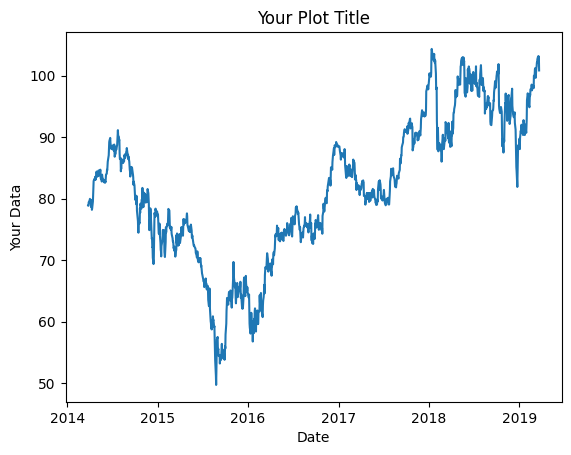

In [7]:
import matplotlib.pyplot as plt



plt.plot(df["Date"], df["Adj Close Chevron stock"])
plt.xlabel("Date")
plt.ylabel("Your Data")
plt.title("Your Plot Title")
plt.show()

In [8]:
df["Price S&P Oil"] = df["Price S&P Oil"].astype(str)

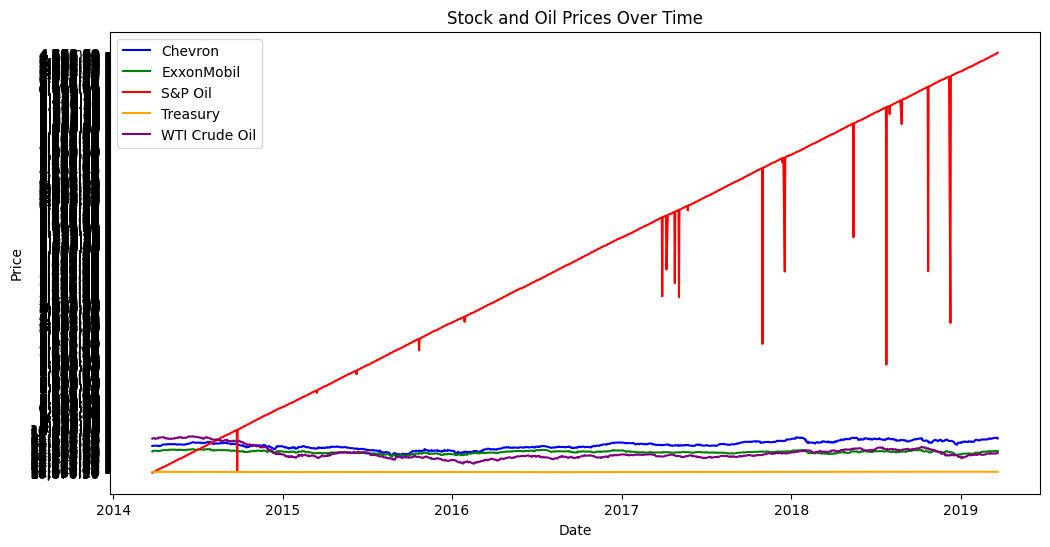

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(df["Date"], df["Adj Close Chevron stock"], label='Chevron', color='blue')

plt.plot(df["Date"], df["Adj Close Exxommobil stock"], label='ExxonMobil', color='green')

plt.plot(df["Date"], df["Price S&P Oil"], label='S&P Oil', color='red')


plt.plot(df["Date"], df["Price treasury"], label='Treasury', color='orange')


plt.plot(df["Date"], df["Price WTI crude oil"], label='WTI Crude Oil', color='purple')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock and Oil Prices Over Time")
plt.legend()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

columns_to_normalize = df.columns[1:]

df["Price S&P Oil"] = pd.to_numeric(df["Price S&P Oil"].str.replace(',', ''), errors='coerce')

scaler = StandardScaler()
for column in columns_to_normalize:
    df[column] = scaler.fit_transform(df[[column]])

In [13]:
df.head()

,Date,Adj Close Chevron stock,Adj Close Exxommobil stock,Price S&P Oil,Price treasury,Price WTI crude oil
0,2014-03-26,-0.229418,0.467524,2.155907,0.895331,2.360919
1,2014-03-27,-0.231706,0.727092,2.165416,0.868502,2.419916
2,2014-03-28,-0.184200,0.973167,2.196066,0.966062,2.437897
3,2014-03-31,-0.160734,0.969800,2.265329,0.956306,2.436211
4,2014-04-01,-0.155583,0.978221,2.289801,1.044110,2.330577


In [14]:
df = df.drop(df.tail(3).index)
len(df)

1256

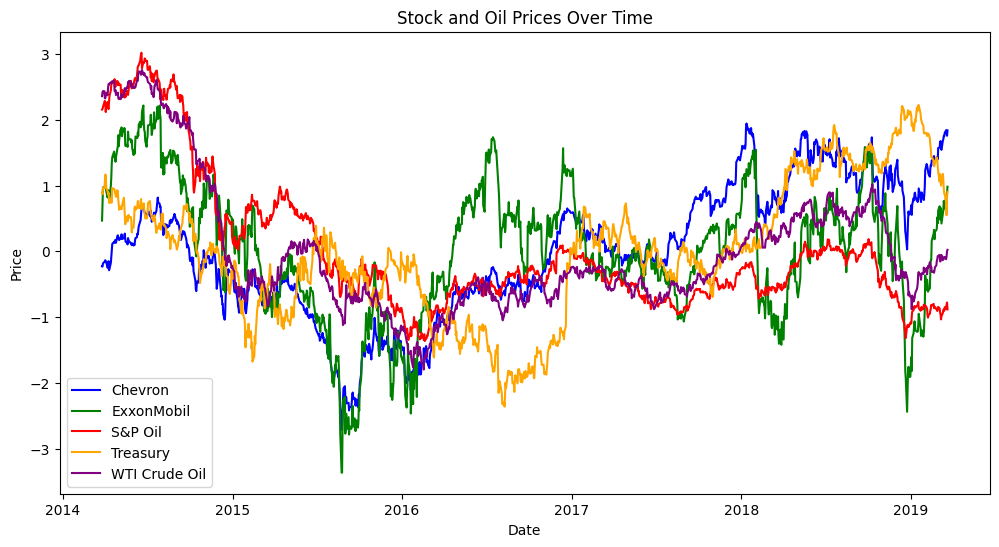

In [15]:
plt.figure(figsize=(12, 6))

plt.plot(df["Date"], df["Adj Close Chevron stock"], label='Chevron', color='blue')

plt.plot(df["Date"], df["Adj Close Exxommobil stock"], label='ExxonMobil', color='green')

plt.plot(df["Date"], df["Price S&P Oil"], label='S&P Oil', color='red')

plt.plot(df["Date"], df["Price treasury"], label='Treasury', color='orange')

plt.plot(df["Date"], df["Price WTI crude oil"], label='WTI Crude Oil', color='purple')

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock and Oil Prices Over Time")
plt.legend()
plt.show()

#Discretizing the dataset

In [16]:
import pandas as pd
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer

features_to_discretize = ['Adj Close Chevron stock', 'Adj Close Exxommobil stock', 'Price S&P Oil', 'Price treasury', 'Price WTI crude oil']


num_bins = 5

df_discretized = df.copy()

for feature in features_to_discretize:

    data = df[feature].values.reshape(-1,1)
    imputer = SimpleImputer(strategy='mean')
    df[feature] = imputer.fit_transform(df[[feature]])


    kbins_discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='uniform')
    df_discretized[f'{feature}_discretized'] = kbins_discretizer.fit_transform(data)



In [17]:
for feature in features_to_discretize:
    df_discretized.drop(f"{feature}", axis=1, inplace=True)


df_discretized.head()




,Date,Adj Close Chevron stock_discretized,Adj Close Exxommobil stock_discretized,Price S&P Oil_discretized,Price treasury_discretized,Price WTI crude oil_discretized
0,2014-03-26,2.0,3.0,4.0,3.0,4.0
1,2014-03-27,2.0,3.0,4.0,3.0,4.0
2,2014-03-28,2.0,3.0,4.0,3.0,4.0
3,2014-03-31,2.0,3.0,4.0,3.0,4.0
4,2014-04-01,2.0,3.0,4.0,3.0,4.0


## Getting a DAG b/w the features vertices using 'pgmpy'

In [18]:
pip install pgmpy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.3 MB/s eta 0:00:00


In [19]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
import pandas as pd


df_discretized = df_discretized.drop(columns=['Date'])

target_variable = 'Adj Close Chevron stock_discretized'

model = BayesianModel()

for feature in df_discretized.columns:
    if feature != target_variable:
        model.add_edge(feature, target_variable)


data = df_discretized.copy()
hc = HillClimbSearch(data)
best_model = hc.estimate()


edges = best_model.edges()

for edge in edges:
    print(f"{edge[0]} -> {edge[1]}")





  0%|          | 0/1000000 [00:00<?, ?it/s]

Adj Close Chevron stock_discretized -> Price treasury_discretized
Adj Close Chevron stock_discretized -> Adj Close Exxommobil stock_discretized
Adj Close Exxommobil stock_discretized -> Price treasury_discretized
Price S&P Oil_discretized -> Price WTI crude oil_discretized
Price S&P Oil_discretized -> Adj Close Chevron stock_discretized
Price S&P Oil_discretized -> Adj Close Exxommobil stock_discretized
Price S&P Oil_discretized -> Price treasury_discretized
Price WTI crude oil_discretized -> Adj Close Chevron stock_discretized
Price WTI crude oil_discretized -> Adj Close Exxommobil stock_discretized
Price WTI crude oil_discretized -> Price treasury_discretized


# As we can see that `WTI crude oil_discretized` and  `S&P Oil_discretized` affect our target directly therfore we will consider both as the parents of Chevron Stock

Selecting only the necessary features from our datasets

In [20]:
selected_columns = ["Date","Price S&P Oil", "Price WTI crude oil", "Adj Close Chevron stock"]
df_selected = df.loc[:, selected_columns]
df_selected.index = df_selected.pop("Date")
df_selected

,Price S&P Oil,Price WTI crude oil,Adj Close Chevron stock
Date,,,
2014-03-26,2.155907,2.360919,-0.229418
2014-03-27,2.165416,2.419916,-0.231706
2014-03-28,2.196066,2.437897,-0.184200
2014-03-31,2.265329,2.436211,-0.160734
2014-04-01,2.289801,2.330577,-0.155583
...,...,...,...
2019-03-15,-0.849859,-0.087202,1.801677
2019-03-18,-0.874090,-0.120353,1.841559
2019-03-19,-0.810087,-0.075403,1.799576


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X = df_selected.drop("Adj Close Chevron stock", axis=1)
y = df_selected["Adj Close Chevron stock"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)


rf_regressor.fit(X_train, y_train)


y_pred = rf_regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.22665480271682445
R^2 Score: 0.7642137431471763


# Auto Regression


# USING LSTM Model on our Chevron Dataset

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import LSTM, Dense


data = pd.read_csv('/content/drive/MyDrive/Stock Price Data/CVX.csv')


data = data[['Date', 'Adj Close']]


data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)


time_steps = 8

# Create sequences of data for training
sequences = []
targets = []
for i in range(len(data) - time_steps):
    seq = data['Adj Close'].values[i:i+time_steps]
    label = data['Adj Close'].values[i+time_steps]
    sequences.append(seq)
    targets.append(label)

sequences = np.array(sequences)
targets = np.array(targets)

scaler = MinMaxScaler(feature_range=(0, 1))

sequences = scaler.fit_transform(sequences.reshape(-1, 1)).reshape(-1, time_steps, 1)

targets = targets.reshape(-1, 1)
targets = scaler.fit_transform(targets)

split_index = int(0.8 * len(sequences))
X_train, X_test = sequences[:split_index], sequences[split_index:]
y_train, y_test = targets[:split_index], targets[split_index:]

model = Sequential()
model.add(LSTM(units=50, input_shape=(time_steps, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))


predictions = model.predict(X_test)

predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test)


r2 = r2_score(y_test, predictions)
print(f'R^2 Score on Test Data: {r2}')


Epoch 1/10
63/63 [==============================] - 8s 51ms/step - loss: 0.0404 - val_loss: 0.0039
Epoch 2/10
63/63 [==============================] - 1s 19ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 3/10
63/63 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 0.0017
Epoch 4/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 5/10
63/63 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 6/10
63/63 [==============================] - 1s 10ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 7/10
63/63 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 0.0016
Epoch 8/10
63/63 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 0.0019
Epoch 9/10
63/63 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 0.0017
Epoch 10/10
8/8 [==============================] - 1s 6ms/step
R^2 Score on Test Data: 0.726767888091572
